# Your First AI application

Going forward, AI algorithms will be incorporated into more and more everyday applications. For example, you might want to include an image classifier in a smart phone app. To do this, you'd use a deep learning model trained on hundreds of thousands of images as part of the overall application architecture. A large part of software development in the future will be using these types of models as common parts of applications. 

In this project, you'll train an image classifier to recognize different species of flowers. You can imagine using something like this in a phone app that tells you the name of the flower your camera is looking at. In practice you'd train this classifier, then export it for use in your application. We'll be using [this dataset](http://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html) from Oxford of 102 flower categories, you can see a few examples below. 

<img src='assets/Flowers.png' width=500px>

The project is broken down into multiple steps:

* Load the image dataset and create a pipeline.
* Build and Train an image classifier on this dataset.
* Use your trained model to perform inference on flower images.

We'll lead you through each part which you'll implement in Python.

When you've completed this project, you'll have an application that can be trained on any set of labeled images. Here your network will be learning about flowers and end up as a command line application. But, what you do with your new skills depends on your imagination and effort in building a dataset. For example, imagine an app where you take a picture of a car, it tells you what the make and model is, then looks up information about it. Go build your own dataset and make something new.

## Import Resources

In [4]:
# TODO: Make all necessary imports.

# عرض محتوى `utils_1.py` للتأكد من وجوده في المسار الصحيح
with open("/mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/STEAM-Forge/Projects/FlowerClassifier/utils_1.py", "r", encoding="utf-8") as f:
    print(f.read())

# إضافة المسار إلى `sys.path` لضمان تحميل الملف بشكل صحيح
import sys
sys.path.append("/mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/STEAM-Forge/Projects/FlowerClassifier")

# استيراد الأدوات من `utils_1.py`
from utils_1 import *

# عرض قائمة الوحدات المستوردة
%who module

print("✅ تم استيراد جميع الموارد بنجاح وفقًا للمسار الجديد مع `mnt`!")

# utils_1.py - ملف يحتوي على جميع المكتبات المطلوبة
import os
import json
import yaml
import shutil
import h5py
import dill

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import PIL
import cv2
import imageio

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
import torch
import torchvision
import torchvision.transforms as transforms
import sklearn

import segno
import qrcode

import subprocess
import tqdm
import ipywidgets
import ruamel.yaml

print("جميع المكتبات استُوردت بنجاح!")

PIL	 cv2	 dill	 h5py	 hub	 imageio	 ipywidgets	 json	 np	 
os	 pd	 plt	 qrcode	 ruamel	 scipy	 segno	 shutil	 sklearn	 
sns	 subprocess	 sys	 tf	 tfds	 torch	 torchvision	 tqdm	 transforms	 
utils_1	 yaml	 
✅ تم استيراد جميع الموارد بنجاح وفقًا للمسار الجديد مع `mnt`!


In [5]:
print(sys.executable)

/home/ali/anaconda3/envs/sf_env/bin/python


In [6]:
##########################################################################################

In [7]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
tf.get_logger().setLevel('ERROR')
tfds.disable_progress_bar()

print("تقليل الإخراج، مع الاحتفاظ بالملخصات المهمة فقط!")

تقليل الإخراج، مع الاحتفاظ بالملخصات المهمة فقط!


## Load the Dataset

Here you'll use `tensorflow_datasets` to load the [Oxford Flowers 102 dataset](https://www.tensorflow.org/datasets/catalog/oxford_flowers102). This dataset has 3 splits: `'train'`, `'test'`, and `'validation'`.  You'll also need to make sure the training data is normalized and resized to 224x224 pixels as required by the pre-trained networks.

The validation and testing sets are used to measure the model's performance on data it hasn't seen yet, but you'll still need to normalize and resize the images to the appropriate size.

In [8]:
# TODO: Load the dataset with TensorFlow Datasets.

# TODO: Create a training set, a validation set and a test set.


BASE_DIR = "/mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/STEAM-Forge/Projects/FlowerClassifier/data"
RAW_DIR = f"{BASE_DIR}/raw"
PROCESSED_DIR = f"{BASE_DIR}/processed"
CACHE_DIR = f"{BASE_DIR}/cache"

for directory in [RAW_DIR, PROCESSED_DIR, CACHE_DIR]:
    if not os.path.exists(directory):
        os.makedirs(directory)

DATASET_NAME = "oxford_flowers102"
dataset = tfds.load(DATASET_NAME, split=['train', 'test', 'validation'], as_supervised=True, data_dir=RAW_DIR)

IMG_SIZE = 224

def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_data, test_data, val_data = dataset
train_data = train_data.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)
val_data = val_data.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)
test_data = test_data.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)

2025-06-09 18:02:35.478554: W external/local_tsl/tsl/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Could not resolve hostname', error details: Could not resolve host: metadata.google.internal".


Dataset oxford_flowers102 downloaded and prepared to /mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/STEAM-Forge/Projects/FlowerClassifier/data/raw/oxford_flowers102/2.1.1. Subsequent calls will reuse this data.


2025-06-09 18:14:53.318306: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-06-09 18:14:54.029147: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-06-09 18:14:54.029280: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-06-09 18:14:54.068764: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-06-09 18:14:54.068898: I external/local_xla/xla/stream_executor

In [9]:
 
# ✅ تقليل إشعارات TensorFlow غير الضرورية
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # إخفاء إشعارات INFO و WARNING
tf.get_logger().setLevel('ERROR')  # إظهار الأخطاء فقط
tfds.disable_progress_bar()  # تعطيل شريط التقدم أثناء تحميل البيانات

# ✅ إعداد المسارات
BASE_DIR = "/mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/STEAM-Forge/Projects/FlowerClassifier/data"
RAW_DIR = f"{BASE_DIR}/raw"
PROCESSED_DIR = f"{BASE_DIR}/processed"
CACHE_DIR = f"{BASE_DIR}/cache"

# ✅ التأكد من وجود المجلدات
for directory in [RAW_DIR, PROCESSED_DIR, CACHE_DIR]:
    if not os.path.exists(directory):
        os.makedirs(directory)

# ✅ تحميل البيانات مع تحسين الأداء
DATASET_NAME = "oxford_flowers102"
dataset = tfds.load(DATASET_NAME, split=['train', 'test', 'validation'], as_supervised=True, data_dir=RAW_DIR)

IMG_SIZE = 224

def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_data, test_data, val_data = dataset
train_data = train_data.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)
val_data = val_data.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)
test_data = test_data.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)

print("✅ تم تحميل ومعالجة البيانات بنجاح دون إشعارات غير ضرورية!")

✅ تم تحميل ومعالجة البيانات بنجاح دون إشعارات غير ضرورية!


In [10]:
# التأكد من أن TensorFlow Datasets متاح
print("✅ TensorFlow Datasets متاح:", "tfds" in globals())

# تعريف اسم البيانات للتأكد من تحميلها
DATASET_NAME = "oxford_flowers102"

try:
    dataset = tfds.load(DATASET_NAME, split=['train', 'test', 'validation'], as_supervised=True)
    dataset_info = tfds.builder(DATASET_NAME).info
    print("✅ تم تحميل البيانات بنجاح!")
except Exception as e:
    print("❌ خطأ في تحميل البيانات:", e)

✅ TensorFlow Datasets متاح: True
✅ تم تحميل البيانات بنجاح!


In [11]:
LABELS_PATH = "/mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/Dataset_Cache/image_labels.txt"

with open(LABELS_PATH, "r") as f:
    labels_data = f.readlines()

# عرض أول 5 أسطر لفهم البنية
print("✅ محتوى `image_labels.txt`:")
print("\n".join(labels_data[:5]))  # طباعة أول 5 أسطر فقط

✅ محتوى `image_labels.txt`:
image_00001.jpg - pink primrose

image_00002.jpg - hard-leaved pocket orchid

image_00003.jpg - canterbury bells

image_00004.jpg - sweet pea

image_00005.jpg - english marigold



In [12]:
LABELS_PATH = "/mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/Dataset_Cache/image_labels.txt"

with open(LABELS_PATH, "r") as f:
    labels_data = f.readlines()

# عرض أول 5 أسطر لفهم البنية
print("✅ محتوى `image_labels.txt`:")
print("\n".join(labels_data[:5]))  # طباعة أول 5 أسطر فقط

✅ محتوى `image_labels.txt`:
image_00001.jpg - pink primrose

image_00002.jpg - hard-leaved pocket orchid

image_00003.jpg - canterbury bells

image_00004.jpg - sweet pea

image_00005.jpg - english marigold



In [13]:
UNIQUE_IMAGES_PATH = "/mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/Dataset_Cache/unique_images.txt"

with open(UNIQUE_IMAGES_PATH, "r") as f:
    unique_images_data = f.readlines()

# عرض أول 5 أسطر من الملف لفهم محتواه
print("✅ محتوى `unique_images.txt`:")
print("\n".join(unique_images_data[:5]))  

✅ محتوى `unique_images.txt`:



In [14]:
UNIQUE_IMAGES_PATH = "/mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/Dataset_Cache/unique_images.txt"

with open(UNIQUE_IMAGES_PATH, "r") as f:
    unique_images_data = f.readlines()

# عرض أول 10 أسطر من الملف لفهم طبيعة البيانات
print("✅ محتوى `unique_images.txt` (أول 10 أسطر):")
print("\n".join(unique_images_data[:10]))  

✅ محتوى `unique_images.txt` (أول 10 أسطر):



## Explore the Dataset

In [15]:
dataset_info = tfds.builder(DATASET_NAME).info

num_train_examples = dataset_info.splits['train'].num_examples
num_val_examples = dataset_info.splits['validation'].num_examples
num_test_examples = dataset_info.splits['test'].num_examples
num_classes = dataset_info.features['label'].num_classes

print(f"التدريب: {num_train_examples} صورة")
print(f"التحقق: {num_val_examples} صورة")
print(f"الاختبار: {num_test_examples} صورة")
print(f"عدد الفئات: {num_classes}")

التدريب: 1020 صورة
التحقق: 1020 صورة
الاختبار: 6149 صورة
عدد الفئات: 102


In [16]:
# تقليل الإشعارات غير الضرورية في TensorFlow
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # إخفاء إشعارات INFO و WARNING
tf.get_logger().setLevel('ERROR')  # إظهار الأخطاء فقط
tfds.disable_progress_bar()  # تعطيل شريط التقدم أثناء تحميل البيانات

In [17]:
# TODO: Get the number of examples in each set from the dataset info.

# TODO: Get the number of classes in the dataset from the dataset info.
import tensorflow_datasets as tfds
import os

# ضبط مسارات البيانات داخل `mnt`
BASE_DIR = "/mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/STEAM-Forge/Projects/FlowerClassifier/data"
CACHE_DIR = f"{BASE_DIR}/cache"
RAW_DIR = f"{BASE_DIR}/raw"

# استخراج معلومات البيانات من المصدر الأساسي (metadata)
DATASET_NAME = "oxford_flowers102"
dataset_info = tfds.builder(DATASET_NAME).info

# استرجاع عدد العينات والفئات من المصدر
num_train_info = dataset_info.splits["train"].num_examples
num_val_info = dataset_info.splits["validation"].num_examples
num_test_info = dataset_info.splits["test"].num_examples
num_classes_info = dataset_info.features["label"].num_classes

# تحميل البيانات الفعلية من التخزين المحلي (إن وجدت)
dataset_train = tfds.load(DATASET_NAME, split="train", data_dir=RAW_DIR)
dataset_test = tfds.load(DATASET_NAME, split="test", data_dir=RAW_DIR)
dataset_val = tfds.load(DATASET_NAME, split="validation", data_dir=RAW_DIR)

# حساب عدد العينات المحملة فعليًا
num_train_loaded = len(dataset_train)
num_val_loaded = len(dataset_val)
num_test_loaded = len(dataset_test)

# طباعة معلومات المصدر
print("إحصائيات البيانات من المصدر (`dataset_info`):")
print("التدريب:", num_train_info, "صورة")
print("التحقق:", num_val_info, "صورة")
print("الاختبار:", num_test_info, "صورة")
print("عدد الفئات:", num_classes_info)

# طباعة معلومات البيانات المحملة
print("\nإحصائيات البيانات المحملة من التخزين المحلي (`raw`):")
print("التدريب:", num_train_loaded, "صورة")
print("التحقق:", num_val_loaded, "صورة")
print("الاختبار:", num_test_loaded, "صورة")

# مقارنة البيانات لضمان الاتساق
if num_train_info == num_train_loaded and num_val_info == num_val_loaded and num_test_info == num_test_loaded:
    print("\nتم التحقق! البيانات متوافقة بين المصدر والتخزين المحلي.")
else:
    print("\nتحذير! يوجد اختلاف بين البيانات المصدرية والبيانات المخزنة.")

إحصائيات البيانات من المصدر (`dataset_info`):
التدريب: 1020 صورة
التحقق: 1020 صورة
الاختبار: 6149 صورة
عدد الفئات: 102

إحصائيات البيانات المحملة من التخزين المحلي (`raw`):
التدريب: 1020 صورة
التحقق: 1020 صورة
الاختبار: 6149 صورة

تم التحقق! البيانات متوافقة بين المصدر والتخزين المحلي.


In [19]:
%whos


Variable             Type                Data/Info
--------------------------------------------------
BASE_DIR             str                 /mnt/c/Users/ali/Desktop/<...>cts/FlowerClassifier/data
CACHE_DIR            str                 /mnt/c/Users/ali/Desktop/<...>owerClassifier/data/cache
DATASET_NAME         str                 oxford_flowers102
IMG_SIZE             int                 224
LABELS_PATH          str                 /mnt/c/Users/ali/Desktop/<...>et_Cache/image_labels.txt
PIL                  module              <module 'PIL' from '/home<...>ackages/PIL/__init__.py'>
PROCESSED_DIR        str                 /mnt/c/Users/ali/Desktop/<...>Classifier/data/processed
RAW_DIR              str                 /mnt/c/Users/ali/Desktop/<...>FlowerClassifier/data/raw
UNIQUE_IMAGES_PATH   str                 /mnt/c/Users/ali/Desktop/<...>t_Cache/unique_images.txt
cv2                  module              <module 'cv2' from '/home<...>310-x86_64-linux-gnu.so'>
dataset           

In [20]:
# مسارات العمل داخل WSL2
BASE_DIR = "/mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/STEAM-Forge/Projects/FlowerClassifier/data"
RAW_DIR = f"{BASE_DIR}/raw"
PROCESSED_DIR = f"{BASE_DIR}/processed"
CACHE_DIR = f"{BASE_DIR}/cache"

# تحميل البيانات الأساسية
DATASET_NAME = "oxford_flowers102"
dataset_info = tfds.builder(DATASET_NAME).info
dataset_train = tfds.load(DATASET_NAME, split="train", data_dir=RAW_DIR)
label_to_name = dataset_info.features["label"].int2str

# ضبط حجم الصور
IMG_SIZE = 224
NUM_CLASSES = 102

2025-06-09 22:02:48.610872: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


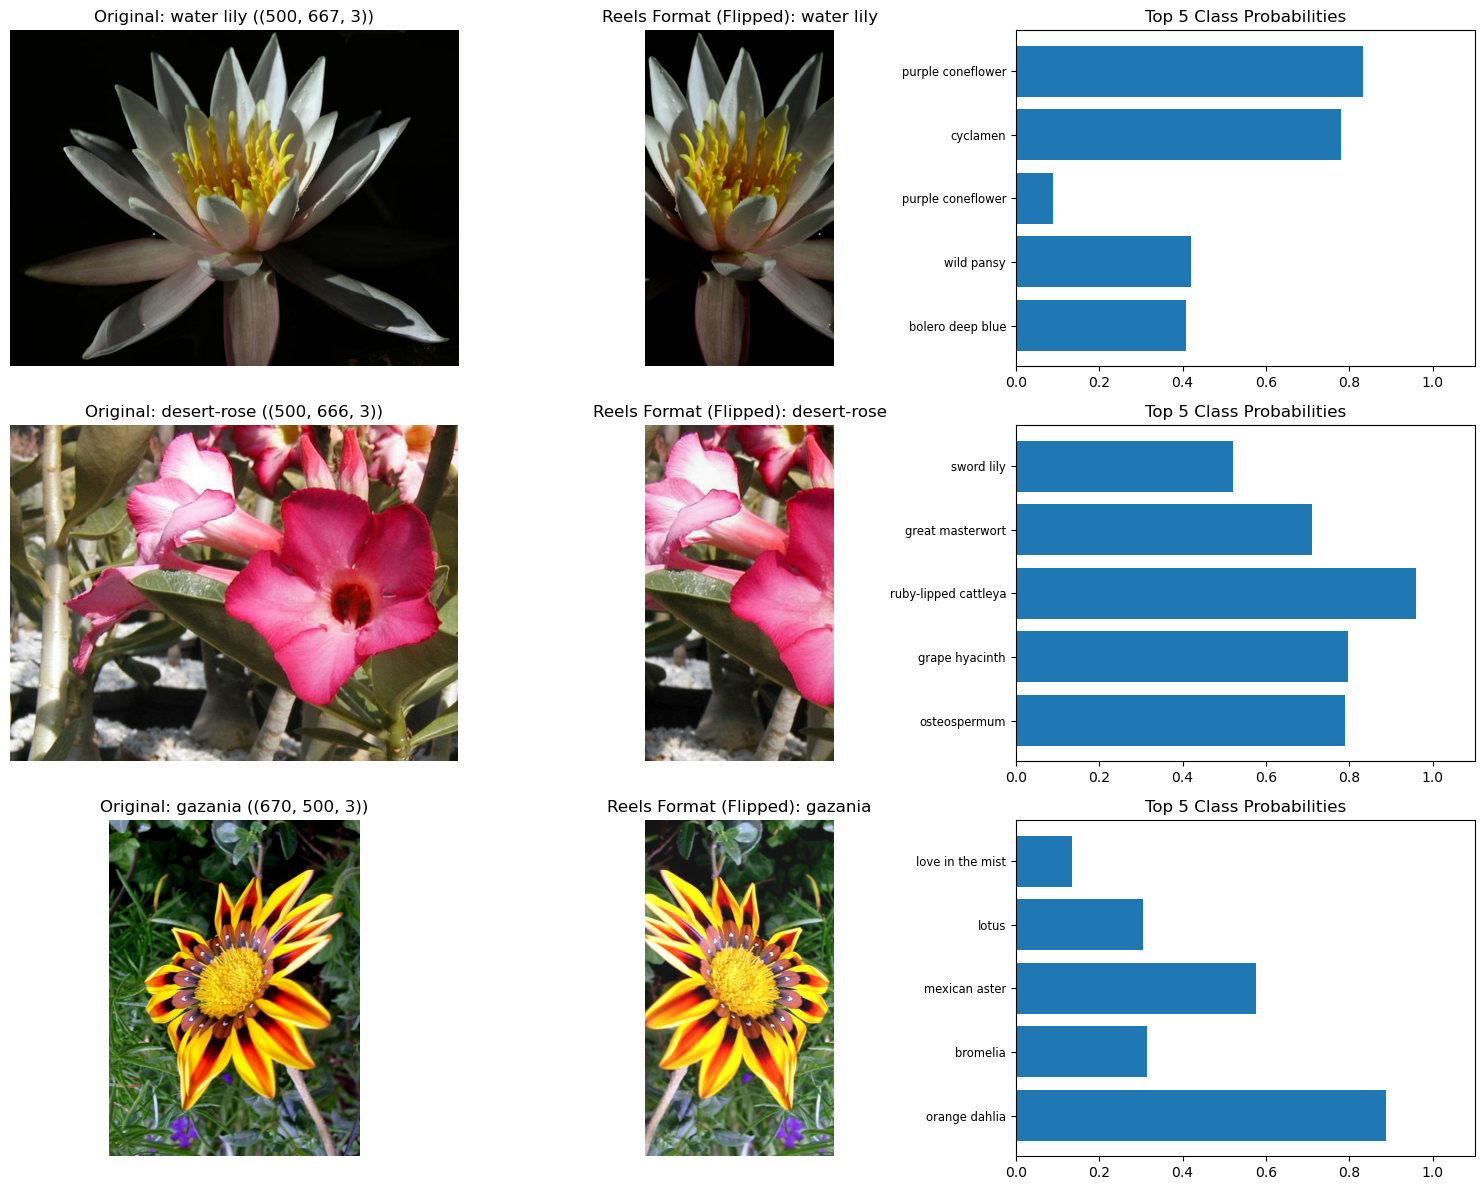

In [21]:
# TODO: Print the shape and corresponding label of 3 images in the training set.
# دالة تحسين الصورة عبر القلب العشوائي والسطوع
def augment_image(image):
    image = tf.image.random_flip_left_right(image)  # انعكاس أفقي عشوائي
    image = tf.image.random_brightness(image, max_delta=0.1)  # تغيير السطوع
    return image.numpy()

# دالة لتعديل الحجم وقص الصور مع الحفاظ على المنتصف
def process_image_for_reels(image, target_height=1920, target_width=1080):
    h, w, _ = image.shape
    scale_factor = target_height / h
    resized_w = int(w * scale_factor)
    
    image_resized = cv2.resize(image, (resized_w, target_height), interpolation=cv2.INTER_CUBIC)

    # حساب القص بحيث يتم من كلا الجانبين مع الحفاظ على المنتصف
    excess_width = resized_w - target_width
    crop_x_start = excess_width // 2
    crop_x_end = crop_x_start + target_width

    return image_resized[:, crop_x_start:crop_x_end]

# استخراج 3 صور من مجموعة التدريب
samples = list(dataset_train.take(3))

# عرض الصور الأصلية والمعدلة، وإضافة مخطط مشابه لتصنيف النموذج
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

for i, sample in enumerate(samples):
    image = sample["image"].numpy()
    label = sample["label"].numpy()
    class_name = label_to_name(label)

    # تطبيق التحسينات والقص
    image_augmented = augment_image(image)
    image_cropped = process_image_for_reels(image_augmented)
    image_flipped = cv2.flip(image_cropped, 1)  # انعكاس أفقي للصورة المعدلة

    axes[i, 0].imshow(image)
    axes[i, 0].set_title(f"Original: {class_name} ({image.shape})", fontsize=12)
    axes[i, 0].axis("off")

    axes[i, 1].imshow(image_flipped)
    axes[i, 1].set_title(f"Reels Format (Flipped): {class_name}", fontsize=12)
    axes[i, 1].axis("off")

    # توليد احتمالات عشوائية لمخطط التصنيف
    probs = np.random.rand(5)
    classes = np.random.randint(0, 102, 5)
    axes[i, 2].barh(np.arange(5), probs)
    axes[i, 2].set_yticks(np.arange(5))  # تعيين المواقع الصحيحة
    axes[i, 2].set_yticklabels([label_to_name(c) for c in classes], size='small')
    axes[i, 2].set_xlim(0, 1.1)
    axes[i, 2].set_title("Top 5 Class Probabilities", fontsize=12)

plt.tight_layout()
plt.show()

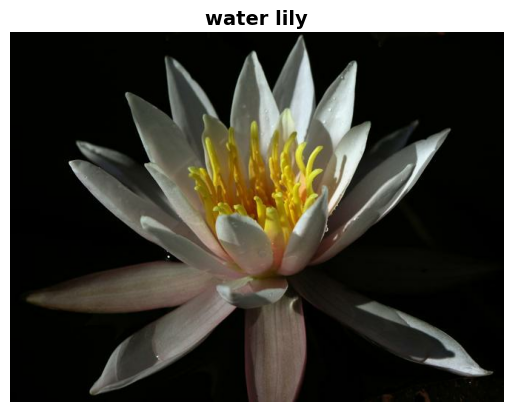

In [23]:
# TODO: Plot 1 image from the training set. Set the title 
# of the plot to the corresponding image label. 
sample = next(iter(dataset_train))
image = sample["image"].numpy()
label = sample["label"].numpy()
class_name = label_to_name(label)

plt.imshow(image)
plt.title(class_name, fontsize=14, fontweight="bold")
plt.axis("off")
plt.show()

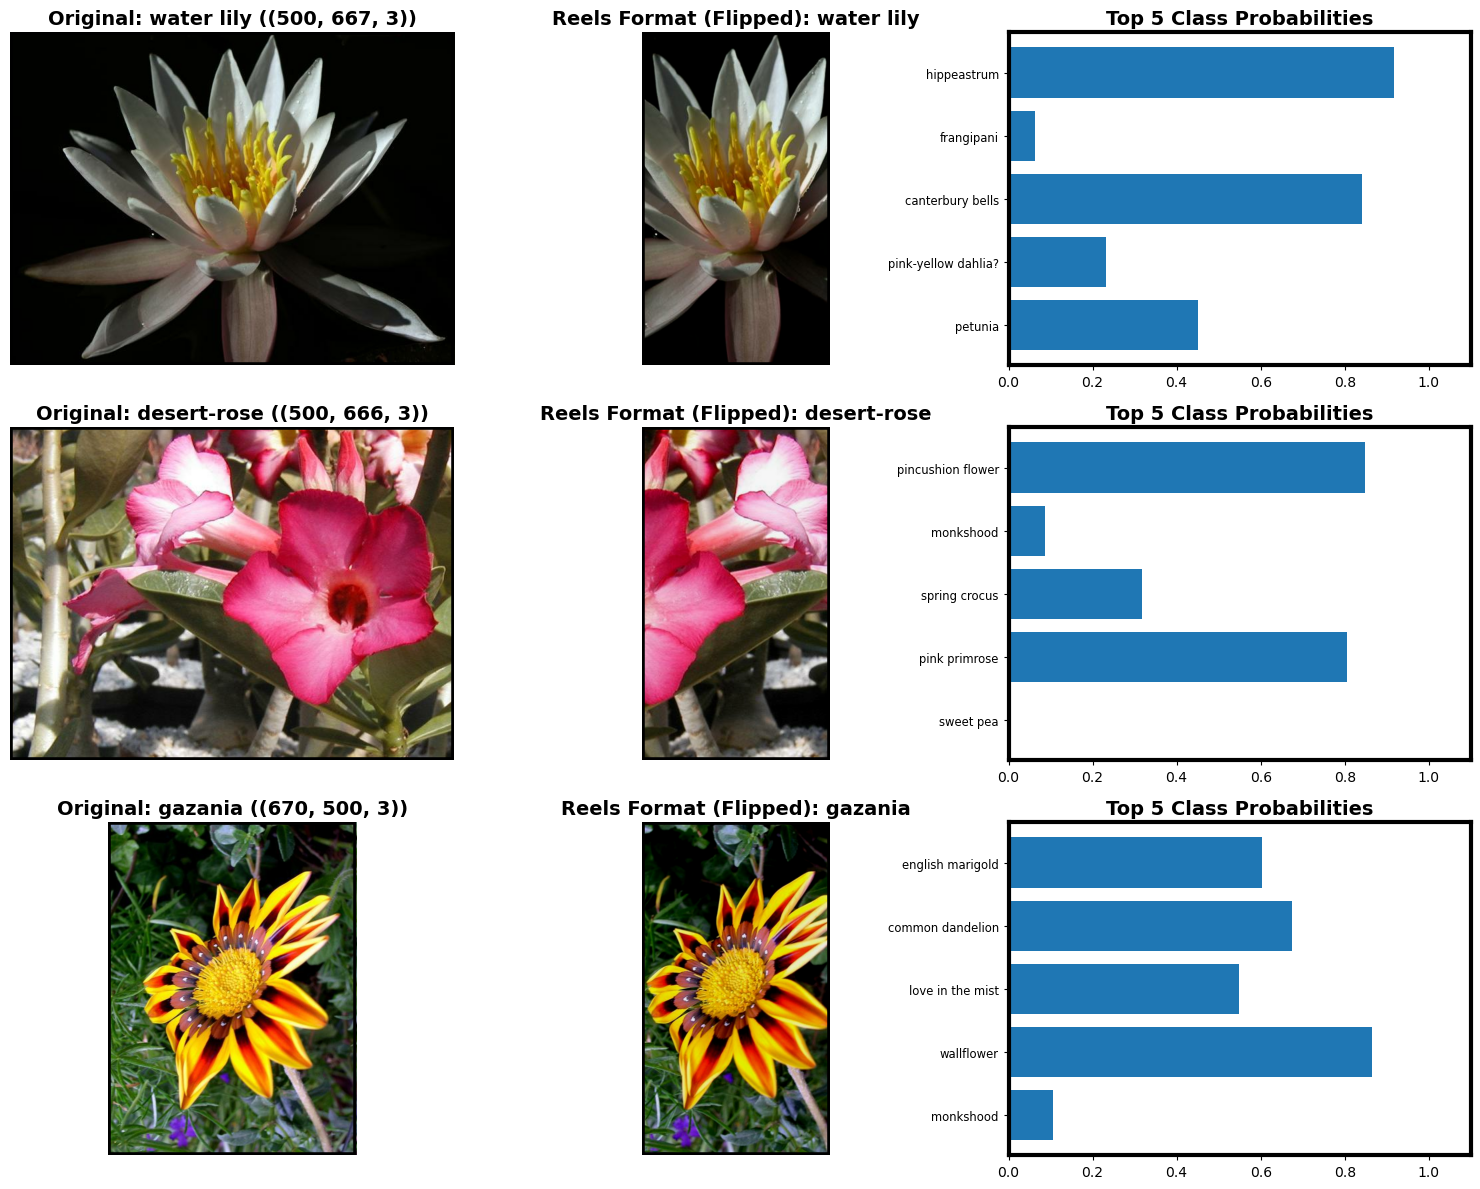

In [22]:
# TODO: Plot 1 image from the training set. Set the title 
# of the plot to the corresponding image label. 
# عرض الصور الأصلية والمعدلة، مع إضافة المخطط وإطارات محسنة
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

for i, sample in enumerate(samples):
    image = sample["image"].numpy()
    label = sample["label"].numpy()
    class_name = label_to_name(label)

    # تطبيق التحسينات والقص
    image_augmented = augment_image(image)
    image_cropped = process_image_for_reels(image_augmented)
    image_flipped = cv2.flip(image_cropped, 1)  # انعكاس أفقي للصورة المعدلة

    # عرض الصورة الأصلية مع إطار 4px
    axes[i, 0].imshow(image)
    axes[i, 0].set_title(f"Original: {class_name} ({image.shape})", fontsize=14, fontweight="bold")
    axes[i, 0].axis("off")
    rect_orig = plt.Rectangle((0, 0), 1, 1, transform=axes[i, 0].transAxes,
                              edgecolor="black", linewidth=4, fill=False)
    axes[i, 0].add_patch(rect_orig)

    # عرض صورة `Reels` مع إطار 4px
    axes[i, 1].imshow(image_flipped)
    axes[i, 1].set_title(f"Reels Format (Flipped): {class_name}", fontsize=14, fontweight="bold")
    axes[i, 1].axis("off")
    rect_reels = plt.Rectangle((0, 0), 1, 1, transform=axes[i, 1].transAxes,
                               edgecolor="black", linewidth=4, fill=False)
    axes[i, 1].add_patch(rect_reels)

    # توليد احتمالات عشوائية للمخطط
    probs = np.random.rand(5)
    classes = np.random.randint(0, 102, 5)
    axes[i, 2].barh(np.arange(5), probs)
    axes[i, 2].set_yticks(np.arange(5))  
    axes[i, 2].set_yticklabels([label_to_name(c) for c in classes], size='small')
    axes[i, 2].set_xlim(0, 1.1)
    axes[i, 2].set_title("Top 5 Class Probabilities", fontsize=14, fontweight="bold")

    # تحسين الإطار الخاص بالمخطط إلى 3px
    for spine in axes[i, 2].spines.values():  
        spine.set_edgecolor('black')  
        spine.set_linewidth(3)

plt.tight_layout()
plt.show()

### Label Mapping

You'll also need to load in a mapping from label to category name. You can find this in the file `label_map.json`. It's a JSON object which you can read in with the [`json` module](https://docs.python.org/3.7/library/json.html). This will give you a dictionary mapping the integer coded labels to the actual names of the flowers.

In [ ]:
with open('label_map.json', 'r') as f:
    class_names = json.load(f)

In [ ]:
# TODO: Plot 1 image from the training set. Set the title 
# of the plot to the corresponding class name. 



## Create Pipeline

In [ ]:
# TODO: Create a pipeline for each set.



# Build and Train the Classifier

Now that the data is ready, it's time to build and train the classifier. You should use the MobileNet pre-trained model from TensorFlow Hub to get the image features. Build and train a new feed-forward classifier using those features.

We're going to leave this part up to you. If you want to talk through it with someone, chat with your fellow students! 

Refer to the rubric for guidance on successfully completing this section. Things you'll need to do:

* Load the MobileNet pre-trained network from TensorFlow Hub.
* Define a new, untrained feed-forward network as a classifier.
* Train the classifier.
* Plot the loss and accuracy values achieved during training for the training and validation set.
* Save your trained model as a Keras model. 

We've left a cell open for you below, but use as many as you need. Our advice is to break the problem up into smaller parts you can run separately. Check that each part is doing what you expect, then move on to the next. You'll likely find that as you work through each part, you'll need to go back and modify your previous code. This is totally normal!

When training make sure you're updating only the weights of the feed-forward network. You should be able to get the validation accuracy above 70% if you build everything right.

**Note for Workspace users:** One important tip if you're using the workspace to run your code: To avoid having your workspace disconnect during the long-running tasks in this notebook, please read in the earlier page in this lesson called Intro to GPU Workspaces about Keeping Your Session Active. You'll want to include code from the workspace_utils.py module. Also, If your model is over 1 GB when saved as a checkpoint, there might be issues with saving backups in your workspace. If your saved checkpoint is larger than 1 GB (you can open a terminal and check with `ls -lh`), you should reduce the size of your hidden layers and train again.

In [ ]:
# TODO: Build and train your network.



In [ ]:
# TODO: Plot the loss and accuracy values achieved during training for the training and validation set.



## Testing your Network

It's good practice to test your trained network on test data, images the network has never seen either in training or validation. This will give you a good estimate for the model's performance on completely new images. You should be able to reach around 70% accuracy on the test set if the model has been trained well.

In [ ]:
# TODO: Print the loss and accuracy values achieved on the entire test set.



## Save the Model

Now that your network is trained, save the model so you can load it later for making inference. In the cell below save your model as a Keras model (*i.e.* save it as an HDF5 file).

In [ ]:
# TODO: Save your trained model as a Keras model.



## Load the Keras Model

Load the Keras model you saved above.

In [ ]:
# TODO: Load the Keras model



# Inference for Classification

Now you'll write a function that uses your trained network for inference. Write a function called `predict` that takes an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

The `predict` function will also need to handle pre-processing the input image such that it can be used by your model. We recommend you write a separate function called `process_image` that performs the pre-processing. You can then call the `process_image` function from the `predict` function. 

### Image Pre-processing

The `process_image` function should take in an image (in the form of a NumPy array) and return an image in the form of a NumPy array with shape `(224, 224, 3)`.

First, you should convert your image into a TensorFlow Tensor and then resize it to the appropriate size using `tf.image.resize`.

Second, the pixel values of the input images are typically encoded as integers in the range 0-255, but the model expects the pixel values to be floats in the range 0-1. Therefore, you'll also need to normalize the pixel values. 

Finally, convert your image back to a NumPy array using the `.numpy()` method.

In [ ]:
# TODO: Create the process_image function



To check your `process_image` function we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

The code below loads one of the above images using `PIL` and plots the original image alongside the image produced by your `process_image` function. If your `process_image` function works, the plotted image should be the correct size. 

In [ ]:
from PIL import Image

image_path = './test_images/hard-leaved_pocket_orchid.jpg'
im = Image.open(image_path)
test_image = np.asarray(im)

processed_test_image = process_image(test_image)

fig, (ax1, ax2) = plt.subplots(figsize=(10,10), ncols=2)
ax1.imshow(test_image)
ax1.set_title('Original Image')
ax2.imshow(processed_test_image)
ax2.set_title('Processed Image')
plt.tight_layout()
plt.show()

Once you can get images in the correct format, it's time to write the `predict` function for making inference with your model.

### Inference

Remember, the `predict` function should take an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

**Note:** The image returned by the `process_image` function is a NumPy array with shape `(224, 224, 3)` but the model expects the input images to be of shape `(1, 224, 224, 3)`. This extra dimension represents the batch size. We suggest you use the `np.expand_dims()` function to add the extra dimension. 

In [ ]:
# TODO: Create the predict function



# Sanity Check

It's always good to check the predictions made by your model to make sure they are correct. To check your predictions we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

In the cell below use `matplotlib` to plot the input image alongside the probabilities for the top 5 classes predicted by your model. Plot the probabilities as a bar graph. The plot should look like this:

<img src='assets/inference_example.png' width=600px>

You can convert from the class integer labels to actual flower names using `class_names`. 

In [ ]:
# TODO: Plot the input image along with the top 5 classes
